# **CA4. Multiprocessing**
**Sulu Chi Yahir Benjamin\
Data Engineering\
Universidad Politécnica de Yucatán\
Ucú, Yucatán, México\
2109145@upy.edu.mx**

# Part 5. Compiling to C

12. Use the marco geoestadístico 2010 (https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469)     and 2020 (https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825292812) to obtain the “Áreas Geoestadísticas Básicas”(AGEBs) from Mérida, Yucatán. AGEBs evolve on time.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
M2010 = gpd.read_file('AGEB_urb_2010_5.dbf')
M2010.head()

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry
0,LA_6052,0100100013204,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,1,"POLYGON ((2475018.434 1098724.434, 2475012.982..."
1,LA_6052,0100100013721,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,2,"POLYGON ((2475469.244 1098964.293, 2475431.454..."
2,LA_6052,0100100010657,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,3,"POLYGON ((2470787.576 1096193.647, 2470787.327..."
3,LA_6052,0100100011528,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,4,"POLYGON ((2470709.683 1097766.390, 2470705.629..."
4,LA_6052,0100100011674,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,5,"POLYGON ((2466998.954 1095069.117, 2467001.023..."


In [2]:
# Filtering by "Clave geoestadistica concatenada"
M_2010 = M2010[M2010['CVEGEO'].str.startswith('31050')]
M_2010


,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry
53392,LA_6052,310500001516A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53393,"POLYGON ((3779011.482 1044206.738, 3779006.208..."
53393,LA_6052,3105000012625,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53394,"POLYGON ((3774738.557 1051086.957, 3774742.268..."
53394,LA_6052,3105000012697,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53395,"POLYGON ((3774600.177 1053733.617, 3774614.671..."
53395,LA_6052,3105000013572,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53396,"POLYGON ((3774145.121 1052822.459, 3774195.333..."
53396,LA_6052,3105000015649,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,53397,"POLYGON ((3774614.438 1051099.182, 3774607.695..."
...,...,...,...,...,...,...,...,...
53861,LA_6052,3105001116276,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53862,"POLYGON ((3776997.723 1035039.429, 3776954.642..."
53862,LA_6052,3105001116280,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53863,"POLYGON ((3777353.490 1035299.171, 3777357.018..."
53863,LA_6052,3105001116295,ÁREA GEOESTADÍSTICA BÁSICA,09/2010,ÁREA,INEGI,53864,"POLYGON ((3777129.513 1035511.935, 3777125.534..."
53864,LA_6052,3105004086596,ÁREA GEOESTADÍSTICA BÁSICA,06/2010,ÁREA,INEGI,53865,"POLYGON ((3782199.467 1045432.053, 3782254.615..."


In [3]:
M_2020 = gpd.read_file('31a.dbf') 
M_2020


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,3100100010130,31,001,0001,0130,"POLYGON ((3776847.045 1015576.473, 3776850.565..."
1,3100100010145,31,001,0001,0145,"POLYGON ((3776745.860 1015499.562, 3776745.439..."
2,3100100010164,31,001,0001,0164,"POLYGON ((3776136.004 1014614.653, 3776022.228..."
3,3100100010126,31,001,0001,0126,"POLYGON ((3776247.740 1014594.755, 3776229.182..."
4,3100100010107,31,001,0001,0107,"POLYGON ((3776613.825 1015270.341, 3776615.972..."
...,...,...,...,...,...,...
1527,3101900630421,31,019,0063,0421,"POLYGON ((3982590.953 1058734.415, 3982559.676..."
1528,3101900630436,31,019,0063,0436,"POLYGON ((3981881.868 1056993.706, 3981910.041..."
1529,3101900620012,31,019,0062,0012,"POLYGON ((3948903.252 1034634.683, 3949053.535..."
1530,3101900620031,31,019,0062,0031,"POLYGON ((3948921.666 1033345.003, 3948961.994..."


In [4]:
# Filtering by "Clave de Municipio" Merida, Yucatan (050)
M_2020 = M_2020[M_2020['CVE_MUN'] == "050"]
M_2020

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
412,3105000015329,31,050,0001,5329,"POLYGON ((3779478.623 1047307.492, 3779480.973..."
413,3105000012466,31,050,0001,2466,"POLYGON ((3777875.435 1056949.722, 3777947.632..."
414,310500001249A,31,050,0001,249A,"POLYGON ((3779713.782 1053802.753, 3779711.800..."
415,3105000015827,31,050,0001,5827,"POLYGON ((3772091.762 1052572.146, 3772125.684..."
416,3105000014706,31,050,0001,4706,"POLYGON ((3772829.128 1047931.320, 3772821.774..."
...,...,...,...,...,...,...
933,3105000017039,31,050,0001,7039,"POLYGON ((3775406.523 1040943.870, 3775457.091..."
934,3105000014049,31,050,0001,4049,"POLYGON ((3775740.093 1048924.453, 3775743.166..."
935,3105000010864,31,050,0001,0864,"POLYGON ((3774665.953 1057517.934, 3774639.617..."
936,310500001085A,31,050,0001,085A,"POLYGON ((3772545.613 1046715.097, 3772453.186..."


Now that we have the required information, solely from Merida, Yucatan, we can start working on the sets.

In [5]:
# The only feature they share is the "CVEGEO" which will be our key now that we will be working with sets
set_2010 = set(M_2010["CVEGEO"])
set_2020 = set(M_2020["CVEGEO"])

# **AGEBs which remains from 2010 on 2020.**

In [6]:
agebs_remain = set_2010.intersection(set_2020)
print("AGEBs that remain from 2010 to 2020:")
agebs_remain

AGEBs that remain from 2010 to 2020:


{'3105000010120',
 '3105000010169',
 '3105000010188',
 '310500001021A',
 '3105000010224',
 '3105000010262',
 '3105000010281',
 '3105000010296',
 '3105000010309',
 '3105000010313',
 '3105000010328',
 '3105000010332',
 '3105000010347',
 '3105000010366',
 '310500001039A',
 '3105000010402',
 '3105000010417',
 '3105000010421',
 '3105000010436',
 '3105000010440',
 '3105000010455',
 '3105000010489',
 '3105000010493',
 '3105000010506',
 '3105000010510',
 '3105000010525',
 '310500001053A',
 '3105000010544',
 '3105000010563',
 '3105000010597',
 '310500001060A',
 '3105000010614',
 '3105000010629',
 '3105000010633',
 '3105000010648',
 '3105000010652',
 '3105000010667',
 '3105000010671',
 '3105000010686',
 '3105000010718',
 '3105000010737',
 '3105000010741',
 '3105000010756',
 '3105000010760',
 '310500001078A',
 '3105000010807',
 '3105000010826',
 '3105000011218',
 '3105000011241',
 '3105000011345',
 '3105000011453',
 '3105000011468',
 '3105000011472',
 '3105000011487',
 '3105000011504',
 '31050000

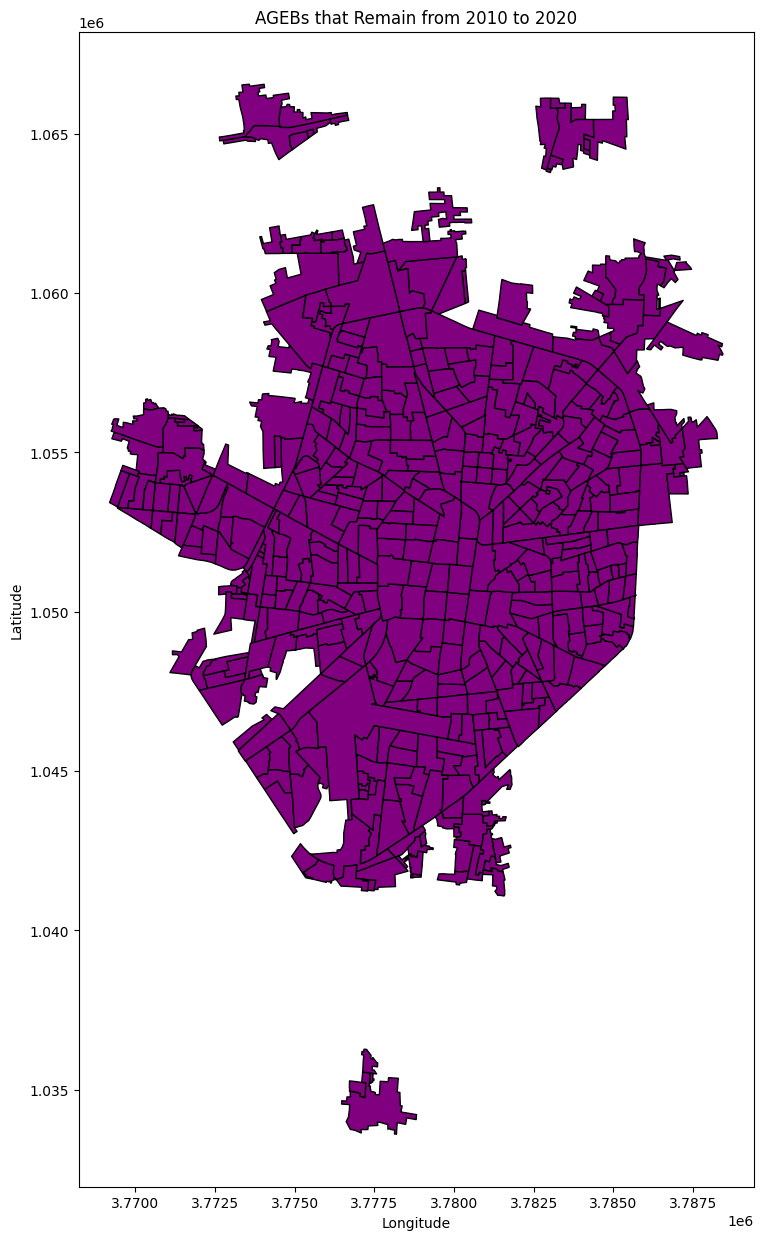

In [7]:
filtered_agebs_2020 = M_2020[M_2020['CVEGEO'].isin(agebs_remain)]

fig, ax = plt.subplots(figsize=(15, 15))
filtered_agebs_2020.plot(ax=ax, color='purple', edgecolor='black')
plt.title('AGEBs that Remain from 2010 to 2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **New AGEBs on 2020.**

In [8]:
new_agebs_2020 = set_2020.difference(set_2010)
print("\nNew AGEBs 2020:")
new_agebs_2020


New AGEBs 2020:


{'3105000010027',
 '3105000010031',
 '3105000010154',
 '3105000010277',
 '3105000010474',
 '3105000010559',
 '3105000010845',
 '310500001085A',
 '3105000010864',
 '3105000010879',
 '3105000014462',
 '3105000014744',
 '3105000014778',
 '3105000016613',
 '3105000016628',
 '3105000016632',
 '3105000016647',
 '3105000016651',
 '3105000016666',
 '3105000016670',
 '310500001669A',
 '3105000016702',
 '3105000016717',
 '3105000016721',
 '3105000016736',
 '3105000016740',
 '3105000016755',
 '310500001676A',
 '3105000016774',
 '3105000016789',
 '3105000016793',
 '3105000016806',
 '3105000016810',
 '3105000016825',
 '310500001683A',
 '3105000016844',
 '3105000016859',
 '3105000016863',
 '3105000016878',
 '3105000016882',
 '3105000016897',
 '310500001690A',
 '3105000016914',
 '3105000016929',
 '3105000016948',
 '3105000016952',
 '3105000016967',
 '3105000016971',
 '3105000016986',
 '3105000016990',
 '3105000017005',
 '310500001701A',
 '3105000017024',
 '3105000017039',
 '3105000017043',
 '31050008

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


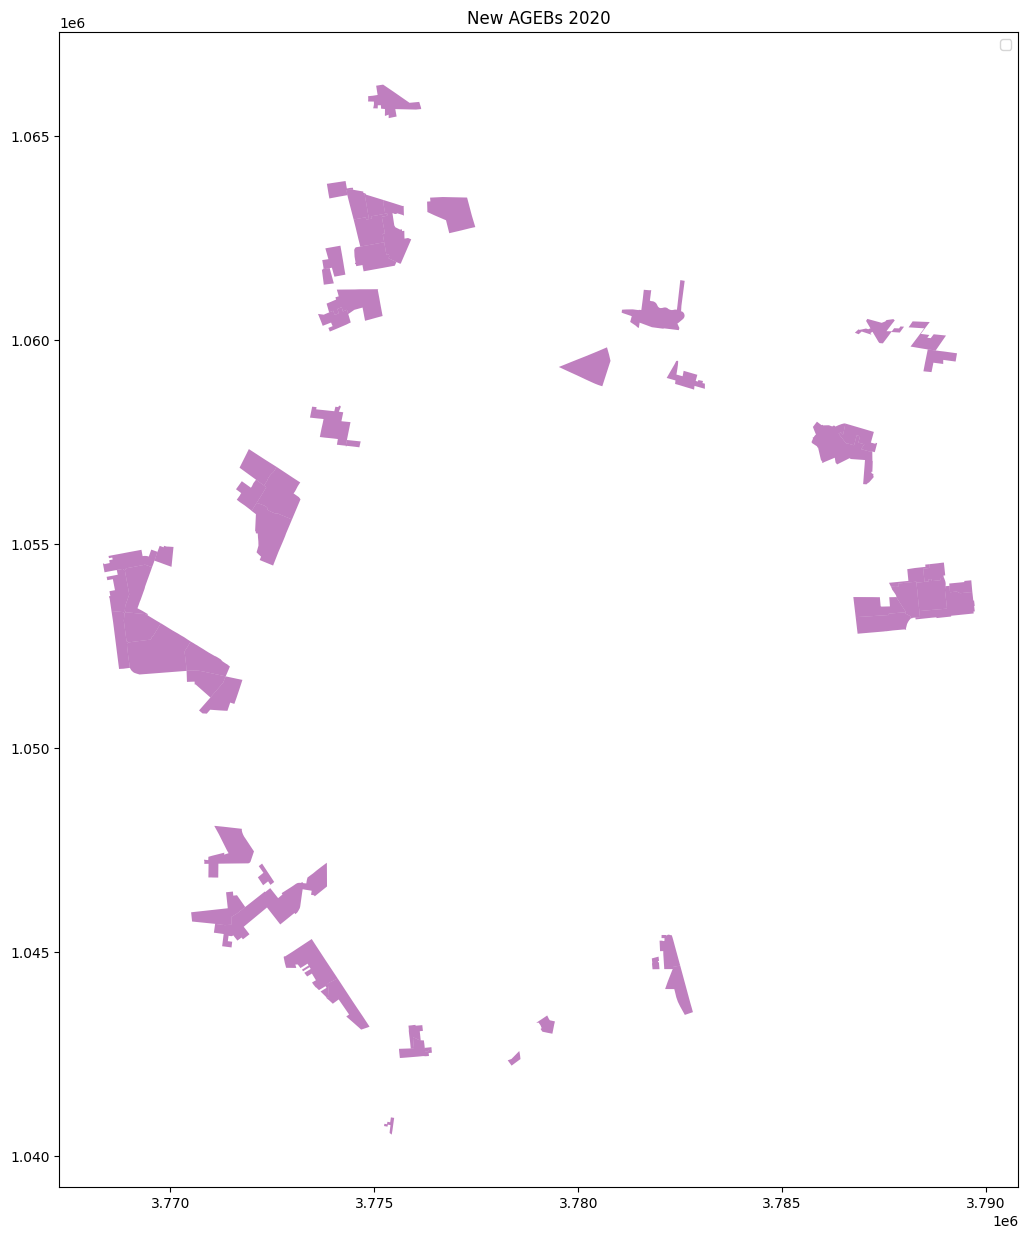

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
M_2020[M_2020["CVEGEO"].isin(new_agebs_2020)].plot(ax=ax, color='purple', alpha=0.5, label='Nuevos AGEBs en 2020')
plt.title('New AGEBs 2020')
plt.legend()
plt.show()


# **AGEBs that disappear from 2010 to 2020.**

In [10]:
agebs_disappear = set_2010.difference(set_2020)
print("\nAGEBs that disappear from 2010 to 2020:")
agebs_disappear



AGEBs that disappear from 2010 to 2020:


{'3105000012752',
 '3105000012767',
 '3105000013534',
 '3105000013835',
 '3105000015507',
 '3105004086596',
 '3105004086609'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


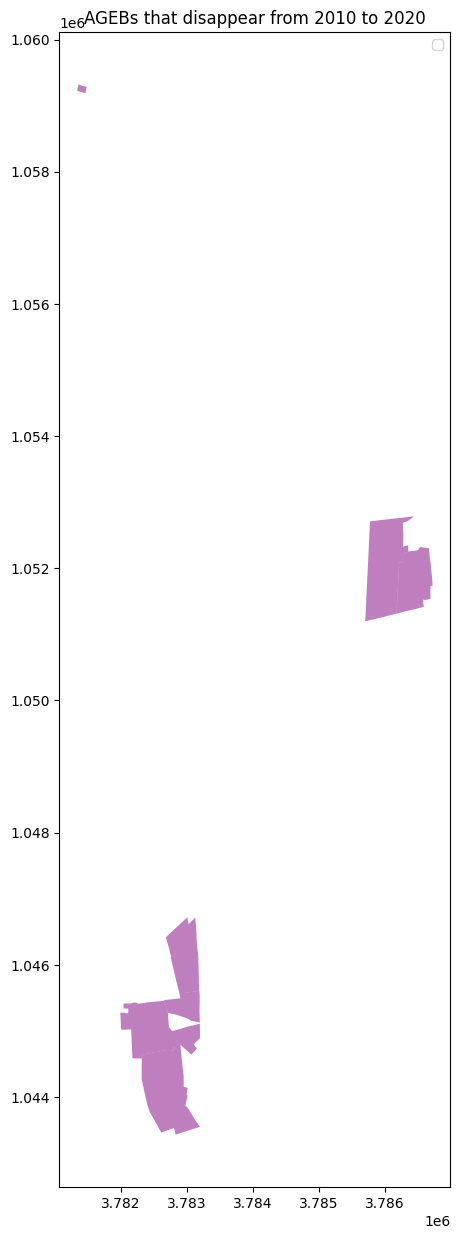

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
M_2010[M_2010["CVEGEO"].isin(agebs_disappear)].plot(ax=ax, color='purple', alpha=0.5, label='AGEBs que desaparecen')
plt.title('AGEBs that disappear from 2010 to 2020')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


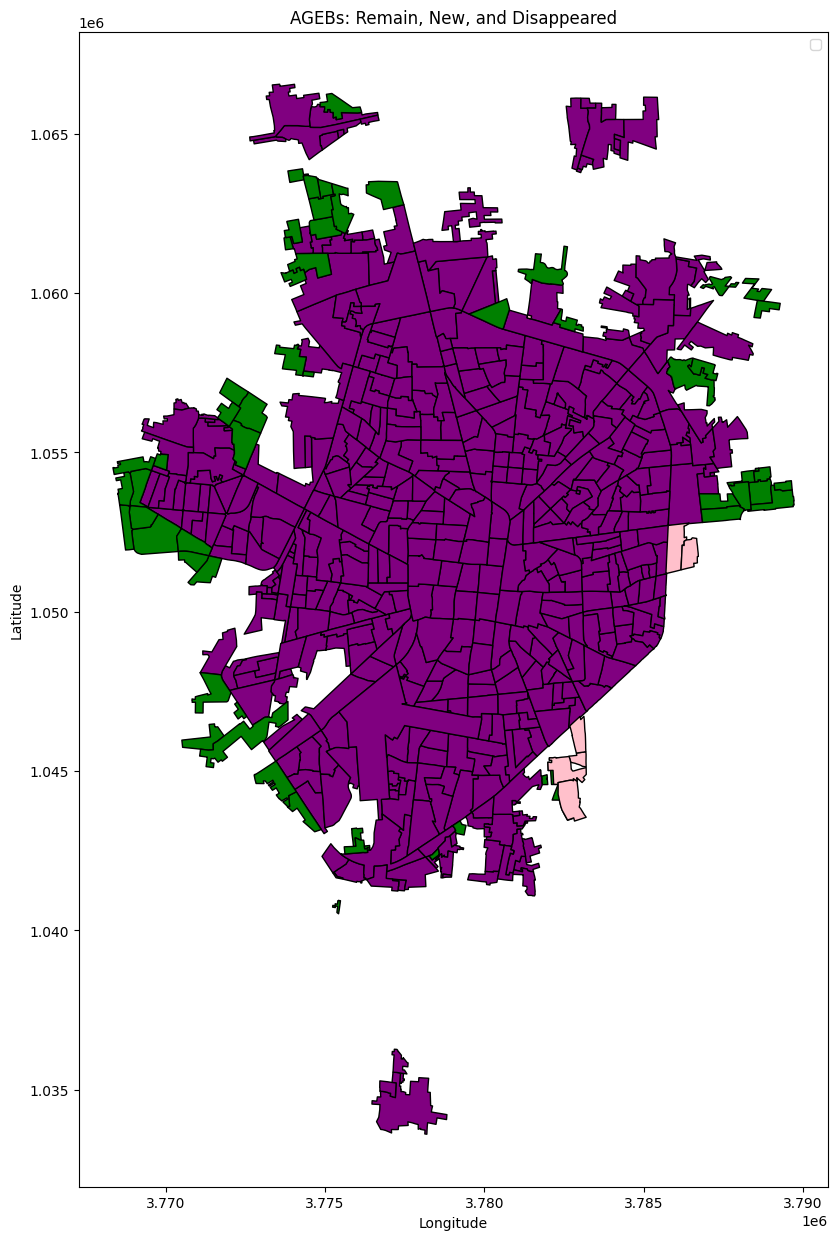

In [12]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the AGEBs that remain from 2010 to 2020 (agebs_remain)
M_2020[M_2020['CVEGEO'].isin(agebs_remain)].plot(ax=ax, color='purple', edgecolor='black', label='Remain from 2010')

# Plot the new AGEBs in 2020 (new_agebs_2020)
M_2020[M_2020['CVEGEO'].isin(new_agebs_2020)].plot(ax=ax, color='green', edgecolor='black', label='New in 2020')

# Plot the AGEBs that disappeared from 2010 to 2020 (disappeared_agebs)
M_2010[~M_2010['CVEGEO'].isin(agebs_remain)].plot(ax=ax, color='pink', edgecolor='black', label='Disappeared by 2020')

# Adding legend and titles
plt.legend()
plt.title('AGEBs: Remain, New, and Disappeared')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()